In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers import Dropout

from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Pretrained Models
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import MobileNet

Using TensorFlow backend.


In [2]:
# base_model = VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [3]:
name_base_model = "VGG16"
base_model=VGG16(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
len(base_model.layers)

19

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [6]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.25)(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model=Model(inputs=base_model.input,outputs=preds)

In [8]:
# for i,layer in enumerate(model.layers):
#   print(i,layer.name)

In [9]:
len(model.layers)

25

In [10]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [11]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('data/training-data',
                                                 target_size=(64,64),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
valid_generator = train_datagen.flow_from_directory('data/testing-data',
                                                  target_size = (64,64),
                                                  color_mode='rgb',
                                                  batch_size=12,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 2000 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [13]:
# Specify parameters
lr = 0.0001
epochs = 50

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
62/62 [==============================] - 83s 1s/step - loss: 0.6669 - acc: 0.5847 - val_loss: 0.5618 - val_acc: 0.7583


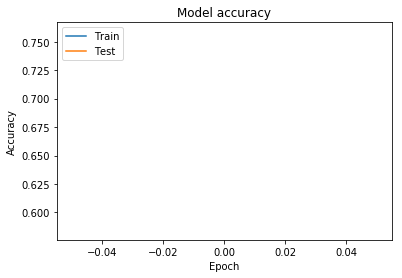

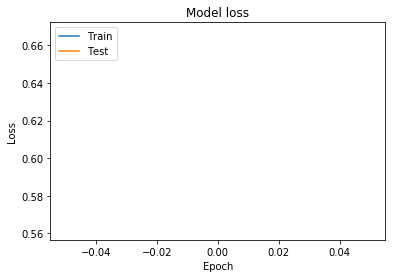

In [14]:
Adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be cbinary_crossentropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
step_size_valid = valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              validation_data=valid_generator,
                              validation_steps=step_size_valid,
                               epochs=epochs)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
# Scalar test loss (if the model has a single output and no metrics) or 
#list of scalars (if the model has multiple outputs and/or metrics).
#The attribute model.metrics_names will give you the display labels for the scalar outputs.
model.evaluate_generator(generator=test_generator,steps=step_size_valid)

[0.47423148453235625, 0.7916666626930237]

In [70]:
valid_generator.reset()
pred = model.predict_generator(valid_generator, steps=step_size_test, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
y_true = test_generator.classes

10/10 [==============================] - 5s 518ms/step


In [71]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53        60
           1       0.54      0.57      0.55        60

   micro avg       0.54      0.54      0.54       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.54      0.54      0.54       120



In [72]:
model.save("{}-{}-{}-adam.h5".format(name_base_model, epochs, lr))

In [ ]:
#testing (Code below is only for testing and is not serving any purpose.)

In [2]:
model = load_model("VGG16-50-0.0001-adam.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
# from PIL import Image

# img = Image.open("tb.jpg")
# img = img_to_array(img)
# image = np.expand_dims(img, axis=0)
# pred = model.predict(image)

In [16]:
# predicted_class_indices=np.argmax(pred,axis=1)
# predicted_class_indices

In [15]:
# model.accuracy

In [3]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________